<div style="display:fill;
            border-radius:12px;
            background-color:lightgreen;
            font-size:200%;
            letter-spacing:0.5px;
            padding:10px;
            color:black;
            border-style: solid;
            border-color: darkgreen;
            border-width: thick;
            text-align:center;">
<b>🌳Everything About Decision Tree Classifier🎨</b></div>

This notebook will show a comprehensive walkthrough of applying decision tree classifier (DTC) on Titanic Survial dataset. Generally known, decision tree is a fundamental block on several top-most popular estimators, i.e., random forest and gradient boosting. However, interpreting those ensemble model is very difficult, but, we can interpret DTC comprehensively by using ready-built Python Packages. Hence, it is reasonable to go in-depth look on how DTC is being applied and explained. This notebook will go through with a simple treatment on the data, and then DTC is used on feature selection, model calibration , model evaluation on unseen data , model visualisation with sample distribution, to highlight for a prediction path, visualising classification boundary and showcase on leaf node interpretation.



#### [1.0 Import Functions and Treatment](#1.0)
* [1.1 Import Package and Define Functions](#1.1)
* [1.2 Drop Unwanted Columns and Imputations](#1.2)
* [1.3 One Hot Encoding](#1.3)

#### [2.0 Applying Decision Tree Classifier](#1.0)
* [2.1 Feature Selection using Decision Tree](#2.1)
* [2.2 Calibrate Models and Evaluation on Unseen Data](#2.2)
* [2.3 Visualise Decision Tree using sklearn](#2.3)
* [2.4 Total impurity of leaves vs effective alphas of pruned tree](#2.4)
* [2.5 Visualise Decision Tree in a fancy manner](#2.5)
* [2.6 To highlight a prediction path for a record](#2.6)
* [2.7 To show only prediction Path for a record](#2.7)
* [2.8 Classification bivariate feature-target space](#2.8)
* [2.9 Classification boundaries in Two dimensional feature space](#2.9)
* [2.10 Classification boundaries in One dimensional feature space](#2.10)
* [2.11 Leaf node purity](#2.11)
* [2.12 Leaf node samples](#2.12)
* [2.13 Explain prediction path](#2.13)



# <b>1.0 <span  style="color:red">|</span> Import Functions and Treatment </b> <a class="anchor" id="1.0"></a>
The first section will import and define useful packages and functions, basic treatment such as drop unwanted columns and imputations; and as well One Hot Encoding

# <b>1.1 <span style='color:red'>|</span> Import Package and Define Functions </b> <a class="anchor" id="1.1"></a>

In [1]:
# treatment packages to be used
import pandas as pd
import numpy as np

# modelling packages to be used
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('classic')


def one_hot_encode(df, column):
    # Get one hot encoding of columns B
    one_hot = pd.get_dummies(df[column]).add_prefix(f'{column}_')
    # Drop column as it is now encoded
    df = df.drop(column,axis = 1)
    print(f"STATUS: One hot encoded {column}")
    # Join the encoded df
    df = df.join(one_hot)
    return df

def null(df,df_name):
    if df.isnull().values.any() ==False:
        print(f'STATUS: There is NO ANY null value in {df_name}')
    else:
        print('STATUS: There is null value in dataframe')
        columns = df.columns[df.isna().any()].tolist()
        temp = {}
        for column in columns:
            count = (len(df)) - (df[column].count())
            temp[column] = f"{count} ({round((count/len(df)), 4)*100}%)"
        print(f'STATUS: Nulls of {df_name} = {temp} of total {len(df)}')

def shape(df,df_name):
    print(f'STATUS: Dimension of "{df_name}" = {df.shape}')

# <b>1.2 <span style='color:red'>|</span> Drop Unwanted Columns and Imputations </b> <a class="anchor" id="1.2"></a>

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

# Set Index
df.set_index('PassengerId', inplace=True)
print("STATUS: PassengerId column is set as index")

# Drop Unwanted Columns
df = df.drop(['Name', 'Ticket'], axis=1)
print("STATUS: 'Name' and 'Ticket' columns are dropped.")

# Imputation
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df['Age'] = df['Age'].fillna(df['Age'].median())
print("STATUS: Imputed Embarked with Mode")
print("STATUS: Imputed Age with Median")

shape(df,'df')
df.head()

STATUS: PassengerId column is set as index
STATUS: 'Name' and 'Ticket' columns are dropped.
STATUS: Imputed Embarked with Mode
STATUS: Imputed Age with Median
STATUS: Dimension of "df" = (891, 9)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


# <b>1.3 <span style='color:red'>|</span> One Hot Encoding </b> <a class="anchor" id="1.3"></a>

In [3]:
df2 = df.copy()
columns = ['Pclass', 'Sex','SibSp','Parch', 'Cabin','Embarked']
for col in columns:
    df2 = one_hot_encode(df2, col)
null(df2,'df2')
shape(df2,'df2')
df2.head()

STATUS: One hot encoded Pclass
STATUS: One hot encoded Sex
STATUS: One hot encoded SibSp
STATUS: One hot encoded Parch
STATUS: One hot encoded Cabin
STATUS: One hot encoded Embarked
STATUS: There is NO ANY null value in df2
STATUS: Dimension of "df2" = (891, 172)


,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,38.0,71.2833,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,26.0,7.9250,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,35.0,53.1000,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,0,35.0,8.0500,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


# <b>2.0 <span style='color:red'>|</span> Applying Decision Tree Classifier </b> <a class="anchor" id="2.0"></a>

This section will show comprehensive walkthrough on applying Decision Tree Classifier, which including Feature Selection, Model Calibration, Evaluation, Fancy Visualisation, Highlight Decision Path and Highlight a Path

# <b>2.1 <span style='color:red'>|</span> Feature Selection using Decision Tree </b> <a class="anchor" id="2.1"></a>

In [4]:
X = df2.drop('Survived', axis=1)
y = df2['Survived'].values
classifier_max = tree.DecisionTreeClassifier(max_depth=None)

def select_feature_dtc(X_train,y_train):
    # get selector.threshold_
    selector = SelectFromModel(estimator=classifier_max).fit(X_train, y_train)
    print(f'selector.threshold_ = {selector.threshold_}')

    feature_name = X_train.columns[selector.get_support()]
    print(f'Number of selected features = {feature_name.shape[0]}')

    # put it into a data frame
    d = {'columns': X_train.columns.tolist(),  'support':selector.get_support()}
    df = pd.DataFrame(data=d)
    df = df[df.support ==True]
    df.reset_index(inplace = True, drop=True)
    return df, feature_name

df, feature_name = select_feature_dtc(X,y)
df

selector.threshold_ = 0.005847953216374269
Number of selected features = 14


,columns,support
0,Age,True
1,Fare,True
2,Pclass_1,True
3,Pclass_3,True
4,Sex_male,True
5,SibSp_0,True
6,SibSp_1,True
7,SibSp_3,True
8,SibSp_4,True
9,Parch_0,True


# <b>2.2 <span style='color:red'>|</span> Calibrate Models and Evaluation on Unseen Data </b> <a class="anchor" id="2.2"></a>

In [5]:
metrics = {
    'f1':[f1_score, 'f1'], 
    'accuracy':[accuracy_score,'accuracy'],
    'recall': [recall_score, 'recall']
}

# get evaluation result

def get_performance(param_grid, base_estimator, df, df_target):
    df_name_list =[]; best_estimator_list=[]; best_score_list=[]; test_predict_result_list=[];
    metric_list = [];
            
    X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.2, random_state=42)
    for _, metric_dict in metrics.items():
        sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5, scoring=metric_dict[1],random_state=42,
                                  factor=2).fit(X_train, y_train)

        best_estimator = sh.best_estimator_
        clf = best_estimator.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        test_predict_result = metric_dict[0](y_test, prediction)
        best_estimator_list.append(best_estimator) ; 
        best_score_list.append(sh.best_score_) ; 
        test_predict_result_list.append(test_predict_result) ;metric_list.append(metric_dict[1])
            
            
    model_result = pd.DataFrame({'Metric':metric_list,
                               'Calibrated Estimator':best_estimator_list,
                               'Best CV Metric Score':best_score_list, 'Test Predict Metric Score': test_predict_result_list})
    return model_result
font = {'family' : 'Tahoma',
        'weight' : 'bold',
        'size'   : 12}
matplotlib.rc('font', **font)

param_grid = {'max_depth': [None,3,4,5,6,7,8,30,32,35,50,100,150,300,400,500, 600, 700, 800]}
base_estimator = tree.DecisionTreeClassifier(random_state=42)
get_performance(param_grid, base_estimator, X, y)

,Metric,Calibrated Estimator,Best CV Metric Score,Test Predict Metric Score
0,f1,"DecisionTreeClassifier(max_depth=5, random_sta...",0.708526,0.717557
1,accuracy,"DecisionTreeClassifier(max_depth=5, random_sta...",0.810507,0.793296
2,recall,"DecisionTreeClassifier(max_depth=700, random_s...",0.680108,0.729730


# <b>2.3 <span style='color:red'>|</span> Visualise Decision Tree using sklearn </b> <a class="anchor" id="2.3"></a>

**Intrepreting the decision tree**
* If a condition is True, go to the left node, if it is false, go to the right node.
* Samples is the total sample size (i.e., number of data points) that fall into the decision path
* The value line in each box is telling you how many samples at that node fall into each category,
* We should follow the path from top down to the leaf node, where the leaf node will teall a prediction result

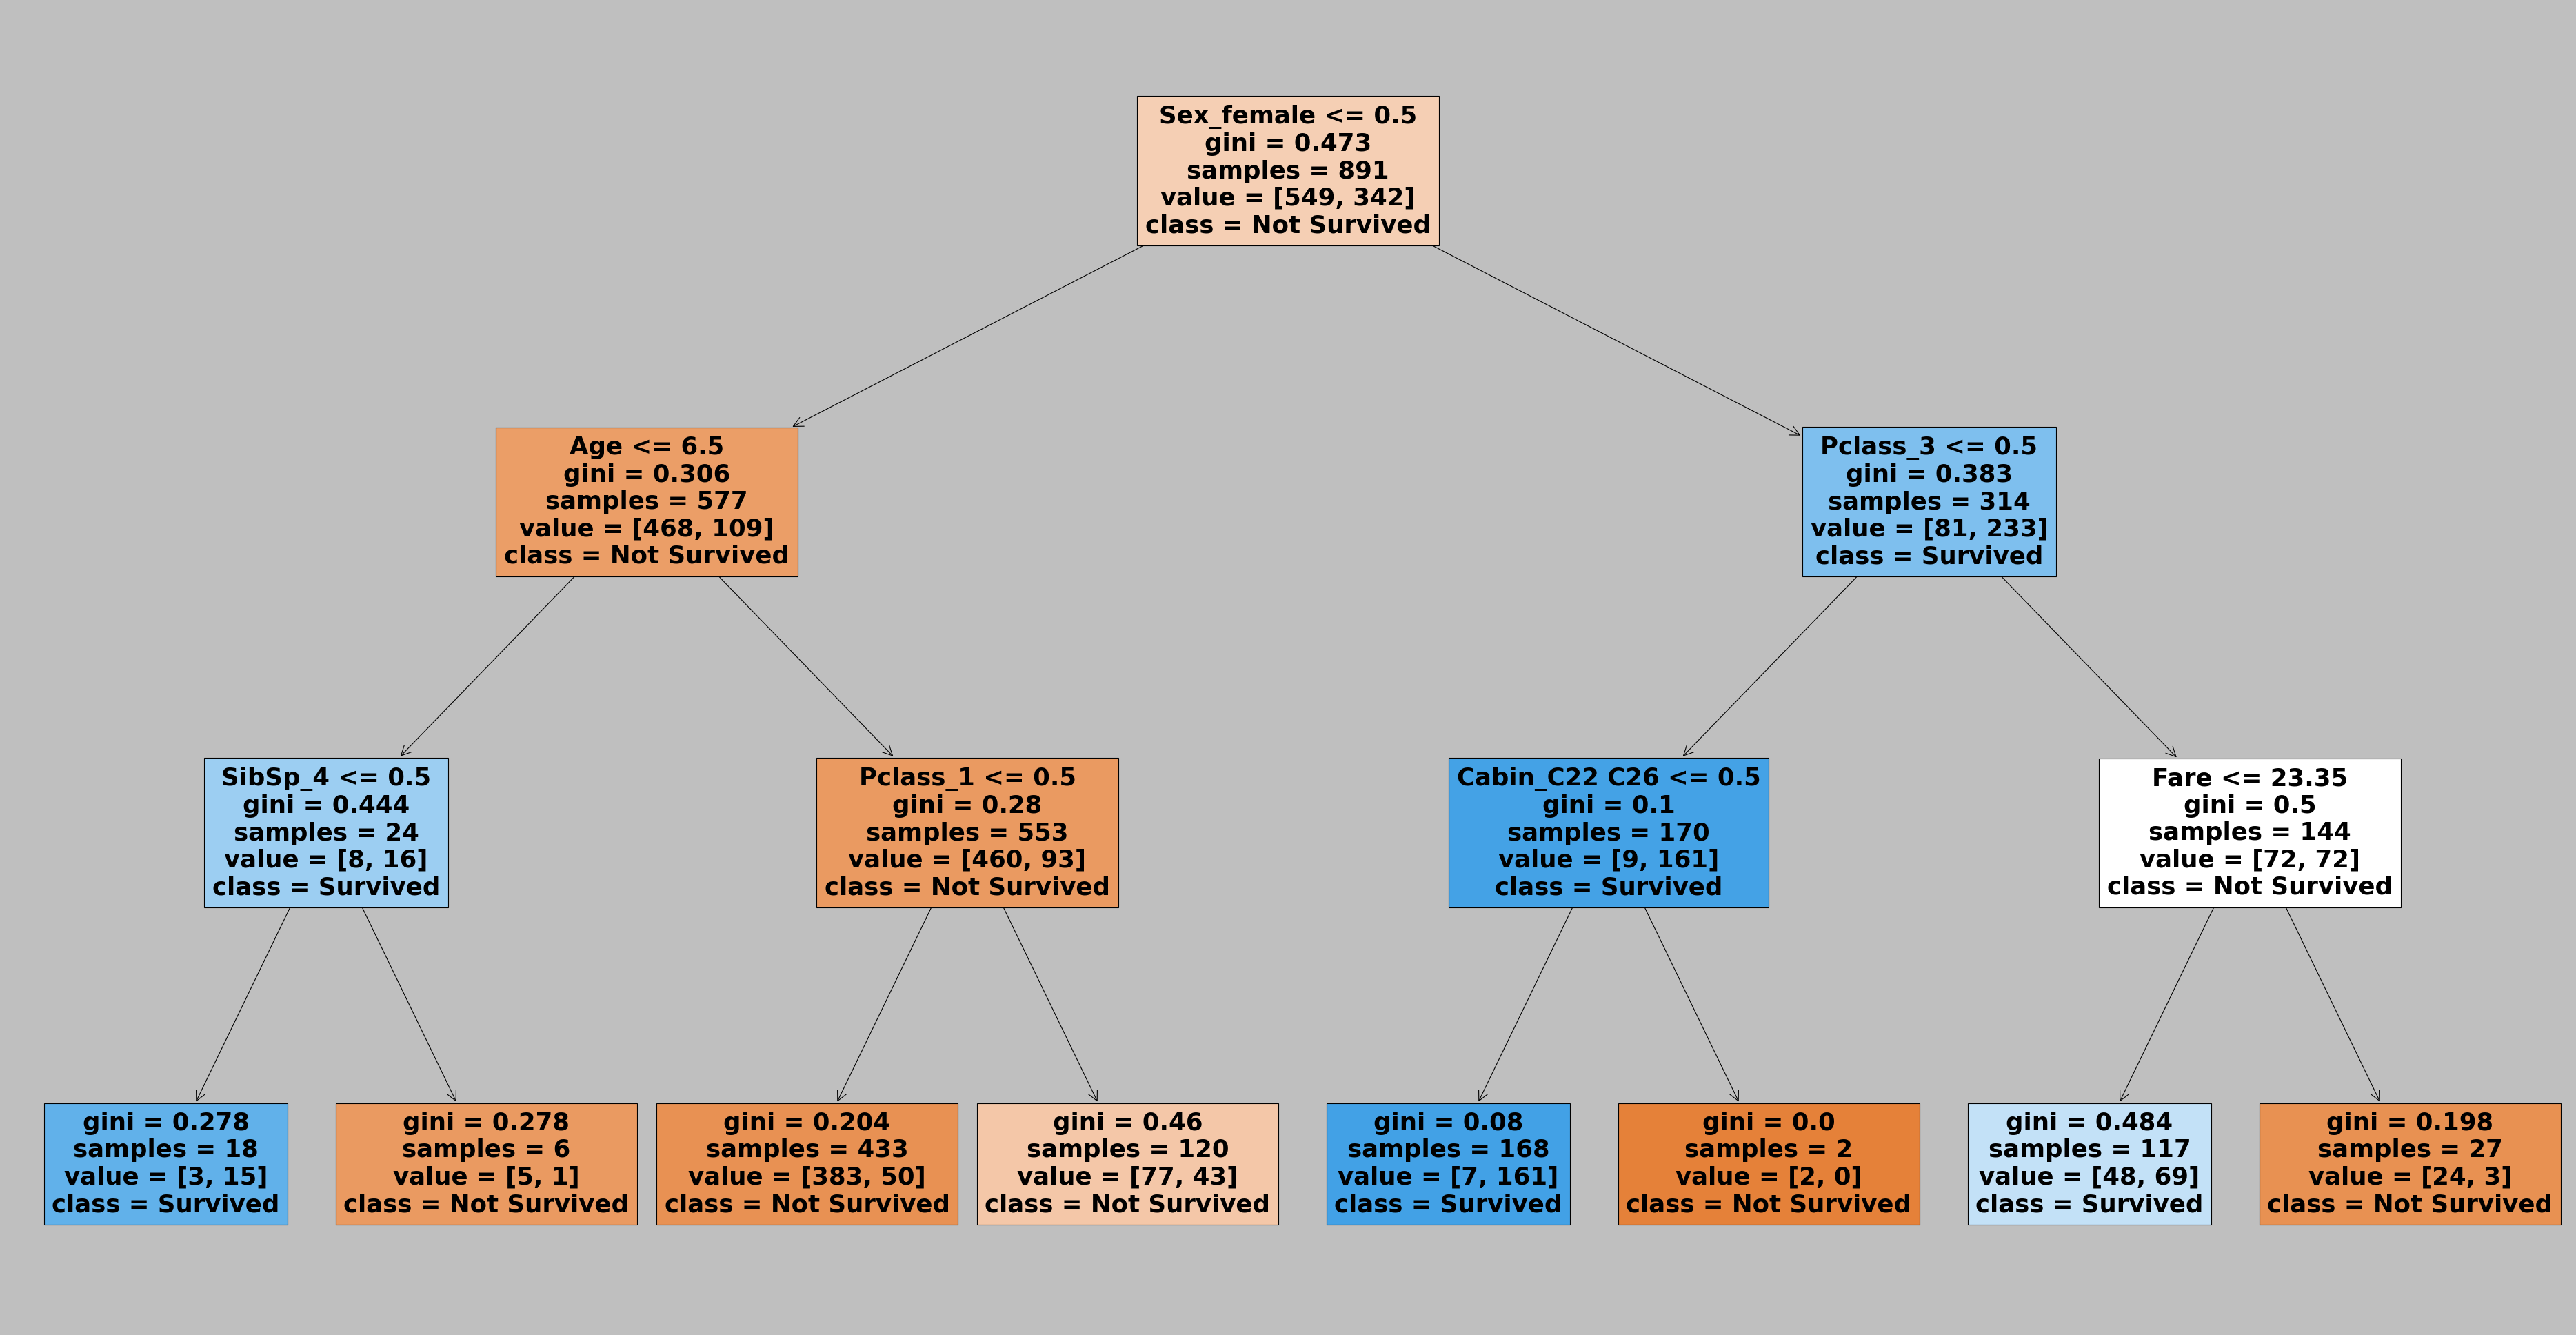

In [6]:
## visualisation
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(X, y)

attribute_names=X.columns
label_names=np.array(["Not Survived", "Survived"])
fig = plt.figure(figsize=(60,30))
tree.plot_tree(classifier, 
                   feature_names =attribute_names,  
                   class_names=label_names,
                   filled=True)
plt.show()

# <b>2.4 <span style='color:red'>|</span> Total impurity of leaves vs effective alphas of pruned tree </b> <a class="anchor" id="2.4"></a>

Low cost and complexity recursive pruning identifies the node with the "weakest link." An effective alpha, where the nodes with the smallest effective alpha are pruned first, identifies the weakest link. Scikit-learn offers DecisionTreeClassifier.cost complexity pruning path, which returns the effective alphas and the accompanying total leaf impurity at each stage of the pruning process, so users can get an idea of what values of ccp alpha would be suitable. More of the tree gets pruned as alpha rises, which raises the overall impurity of the leaves. For more info, check on: [1]

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

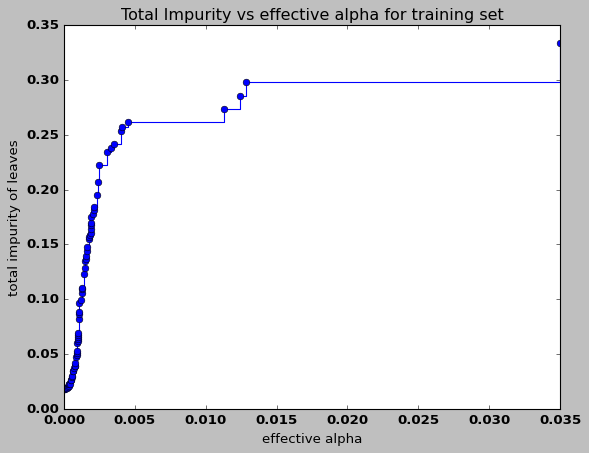

In [7]:
path = classifier_max.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


# <b>2.5 <span style='color:red'>|</span> Visualise Decision Tree in a fancy manner </b> <a class="anchor" id="2.5"></a>

Here will use dtreeviz package (Decision Tree Visualization), to effective produce idioms for model interpretation. For more infor, please check on [2].

In [8]:
# Let's import dtreeviz to visualise super fancy tree
import warnings
warnings.filterwarnings("ignore")
!pip install -q dtreeviz
from dtreeviz.trees import *
from dtreeviz import classifiers
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree

sk_dtree = ShadowSKDTree(classifier, 
               X, 
               y, 
               target_name='Survived',  
               class_names=["Not Survived", "Survived"],
               feature_names=X.columns
               )

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.9.1 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.20.1 which is incompatible.


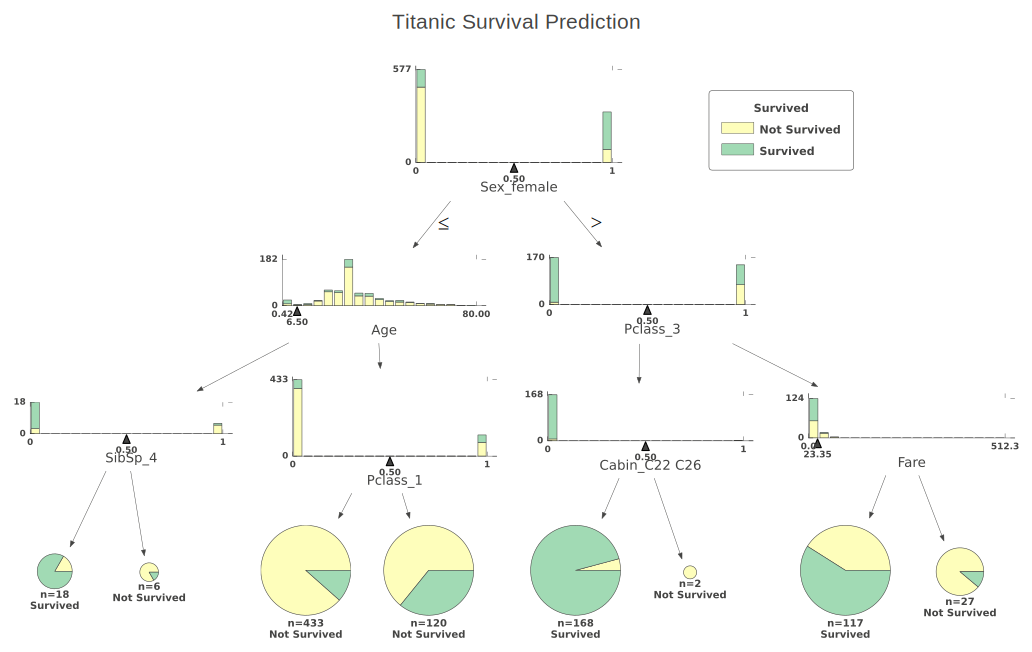

In [9]:
viz = dtreeviz(sk_dtree,
               title= f"Titanic Survival Prediction",
               scale=1.5)
viz

# <b>2.6 <span style='color:red'>|</span> To highlight a prediction path for a record </b> <a class="anchor" id="2.6"></a>


Let's take a look on passenger id 891, to see how the model interpret the predition path

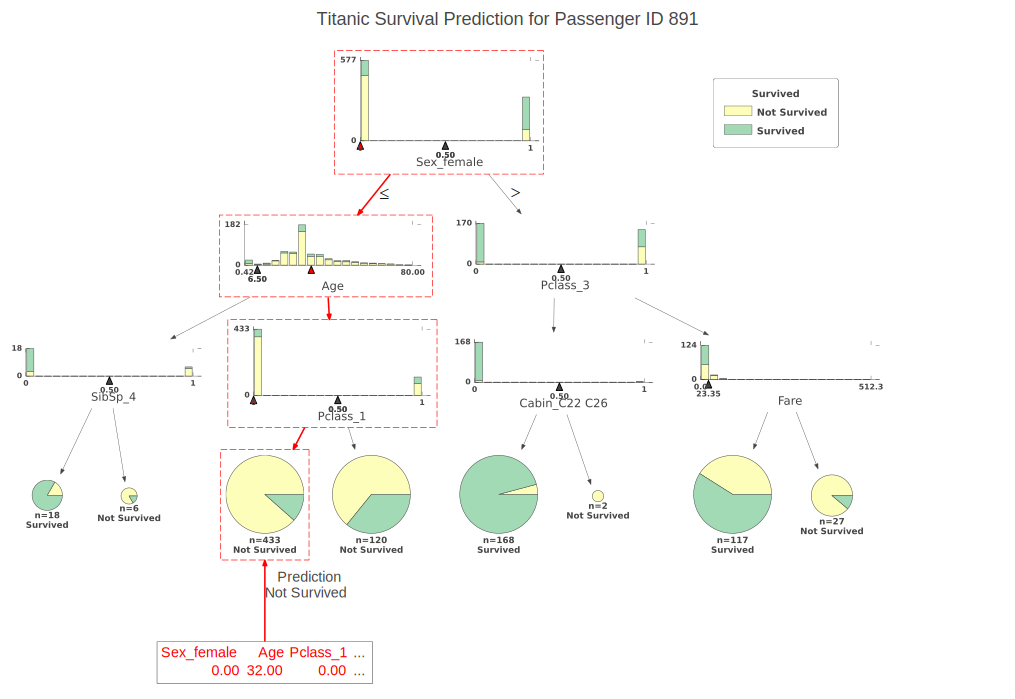

In [10]:
passenger_id = 891
X_select = X.loc[passenger_id,:].values

viz = dtreeviz(sk_dtree,
               title= f"Titanic Survival Prediction for Passenger ID {passenger_id}",
               scale=1.3,
               X=X_select,colors={'highlight': 'red' })
viz

# <b>2.7 <span style='color:red'>|</span> To show only prediction Path </b> <a class="anchor" id="2.7"></a>

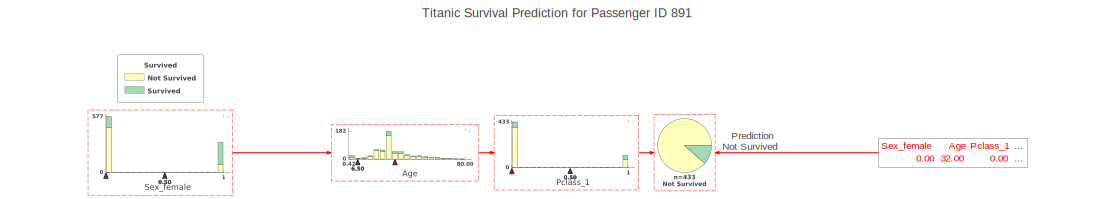

In [11]:
viz = dtreeviz(sk_dtree,
               title= f"Titanic Survival Prediction for Passenger ID {passenger_id}",
               scale=0.9,
               X=X_select,show_just_path=True, orientation ='LR',colors={'highlight': 'red' })

viz

# <b>2.8 <span style='color:red'>|</span> Classification bivariate feature-target space </b> <a class="anchor" id="2.8"></a>


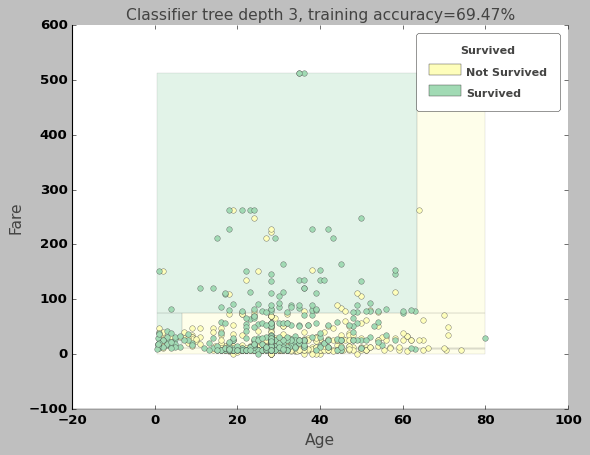

In [12]:
classifier_BINARY = tree.DecisionTreeClassifier(max_depth=3)
classifier_BINARY.fit(X[['Age', 'Fare']], y)

ct = ctreeviz_bivar(classifier_BINARY, X[['Age', 'Fare']], y,
                     feature_names = ['Age', 'Fare'],
                     class_names=["Not Survived", "Survived"],
                     target_name='Survived')

# <b>2.9 <span style='color:red'>|</span> Classification boundaries in Two dimensional feature space </b> <a class="anchor" id="2.9"></a>


At here, it shows the color-coded probabilities, decision boundaries, and misclassified entities in two-dimensional feature space for classifiers.

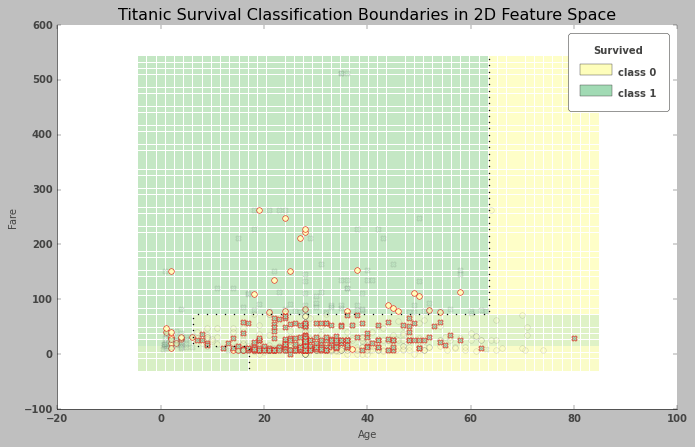

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Titanic Survival Classification Boundaries in 2D Feature Space")
classifiers.clfviz(classifier_BINARY, 
                   X[['Age', 'Fare']], 
                   y, 
                   feature_names=X[['Age', 'Fare']].columns, 
                   markers=['o','X','s','D'], 
                   target_name='Survived',
                   ax=ax,
                  colors={'scatter_marker_alpha':.2})


# <b>2.10 <span style='color:red'>|</span> Classification boundaries in One dimensional feature space </b> <a class="anchor" id="2.10"></a>

At here, it shows the color-coded probabilities, decision boundaries, and misclassified entities in one-dimensional feature space for classifiers.

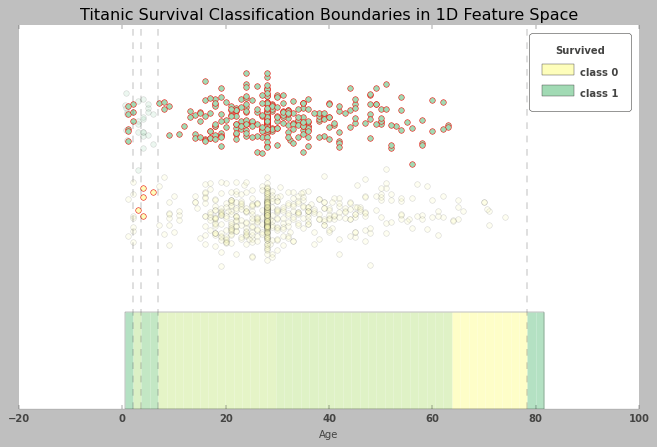

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Titanic Survival Classification Boundaries in 1D Feature Space")
classifier_UNI = tree.DecisionTreeClassifier(max_depth=3)
classifier_UNI.fit(X[['Age']], y)
classifiers.clfviz(classifier_UNI, 
                   X[['Age']], 
                   y, 
                   feature_names=X[['Age']].columns, 
                   target_name='Survived',
                  colors={'scatter_marker_alpha':.2},ax=ax)
plt.show()

# <b>2.11 <span style='color:red'>|</span> Leaf node purity </b> <a class="anchor" id="2.11"></a>

Prediction confidence is impacted by leaf purity.
Leaf purity is calculated for classification based on the majority target class (gini, entropy)
Classification leaves with a large majority of the target class are more accurate predictors. It can be challenging to gain a broad picture of all leaf purities when the decision tree is deep. Because of this, here is to visualise a unique representation that is solely for leaf purities.

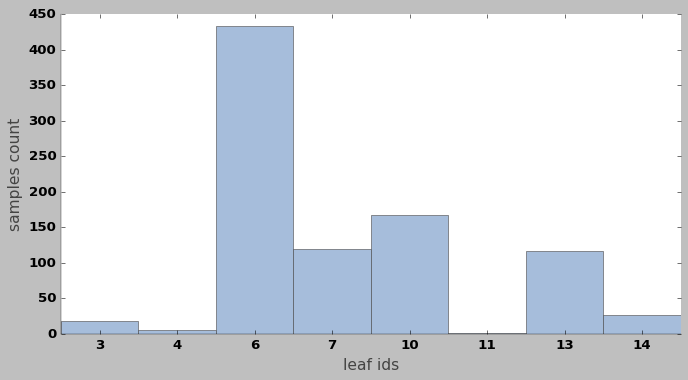

In [15]:
viz_leaf_samples(classifier, X, display_type='plot')

# <b>2.12 <span style='color:red'>|</span> Leaf node samples </b> <a class="anchor" id="2.12"></a>


It's also crucial to consider how many samples of leaves were collected. For instance, having a leaf with good purity but few samples is an indication of overfitting. A leaf with good purity that is based on a considerable number of samples would be the ideal situation.

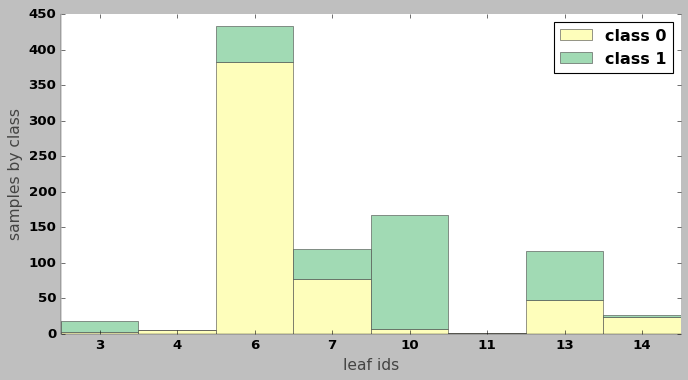

In [16]:
ctreeviz_leaf_samples(classifier, X, y)

# <b>2.13 <span style='color:red'>|</span> Explain prediction path </b> <a class="anchor" id="2.13"></a>


These illustrations can be used to explain to someone who is not familiar with machine learning why your model came to that particular conclusion.
If the explanation type parameter is set to plain english, the prediction path is searched to locate feature value ranges.

In [17]:
passenger_id = 1
print(f"To explain the prediction of passenger_id = {passenger_id}")
print(explain_prediction_path(classifier, X.loc[passenger_id], feature_names=X.columns, explanation_type="plain_english"))

To explain the prediction of passenger_id = 1
6.5 <= Age 
Pclass_1 < 0.5
Sex_female < 0.5



In [18]:
passenger_id = 2
print(f"To explain the prediction of passenger_id = {passenger_id}")
print(explain_prediction_path(classifier, X.iloc[2], feature_names=X.columns, explanation_type="plain_english"))

To explain the prediction of passenger_id = 2
Fare < 23.35
0.5 <= Pclass_3 
0.5 <= Sex_female 

